<a href="https://colab.research.google.com/github/AnshSahu11/Webscraping-Laptop-Dataset-Project/blob/master/laptops_dataframe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

pd.set_option('display.max_rows',None)

In [ ]:
df = pd.read_csv('/content/laptops_cleaned_v1.csv')

In [ ]:
df.drop(columns=['index','processor','ram'],inplace=True)

###univariate

<Axes: xlabel='brand_name'>

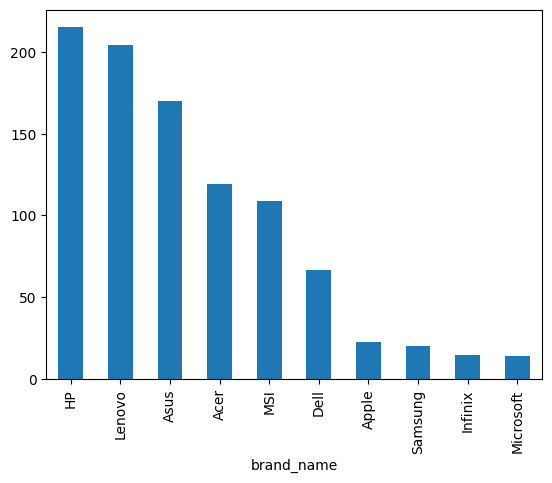

In [ ]:
#plot a graoh of top 5 brands
df['brand_name'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

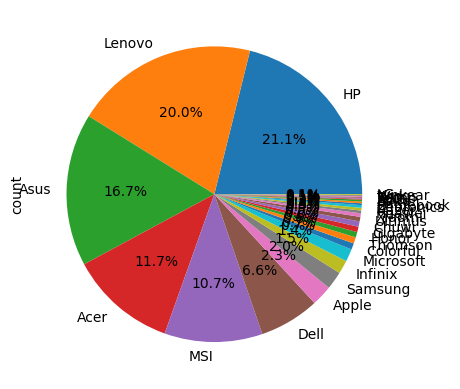

In [ ]:
#pie char
df['brand_name'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df.describe()

,price,rating,threads_num,core_num,ram_num,memory_size,display_size,resolutioin_height,resolutioin_width,warrenty
count,1018.000000,1018.000000,941.00000,996.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,89266.192534,4.360511,14.34644,10.706827,16.119843,674.388998,15.208694,2085.155206,1244.573674,1.101179
std,72477.867661,0.232621,6.40504,4.057922,8.440979,370.005328,0.981107,444.962753,326.819615,0.329743
min,10990.000000,4.000000,2.00000,5.000000,4.000000,32.000000,11.600000,1080.000000,720.000000,1.000000
25%,46899.000000,4.150000,12.00000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,1.000000
50%,67590.000000,4.350000,12.00000,9.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000
75%,99996.750000,4.550000,16.00000,12.000000,16.000000,1000.000000,15.600000,1920.000000,1200.000000,1.000000
max,500990.000000,4.750000,32.00000,24.000000,96.000000,4000.000000,18.000000,3840.000000,2880.000000,3.000000


In [ ]:
df['rating'].describe()

,rating
count,1018.000000
mean,4.360511
std,0.232621
min,4.000000
25%,4.150000
50%,4.350000
75%,4.550000
max,4.750000


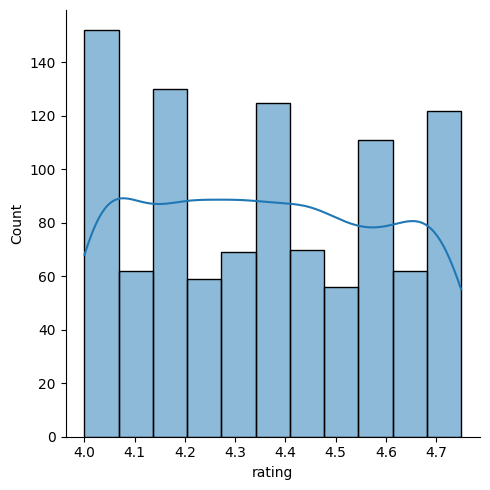

In [ ]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [ ]:
df['rating'].skew()

np.float64(0.06488503962315886)

<Axes: ylabel='rating'>

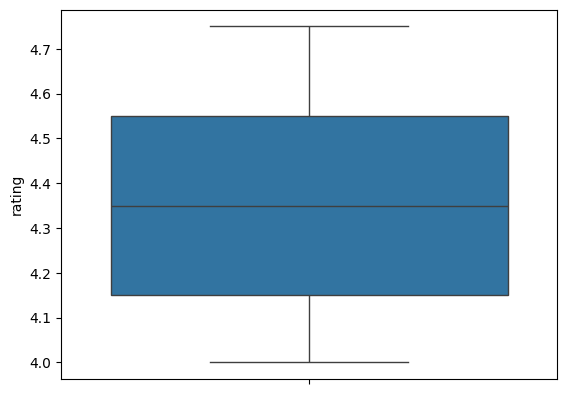

In [ ]:
sns.boxplot(df['rating'])

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'processor_brand', 'iter',
       'threads_num', 'core_num', 'ram_num', 'memory_type', 'memory_size',
       'gpu_brand', 'gpu_type', 'os', 'display_size', 'resolutioin_height',
       'resolutioin_width', 'Touch_Screen', 'warrenty'],
      dtype='object')

<Axes: ylabel='count'>

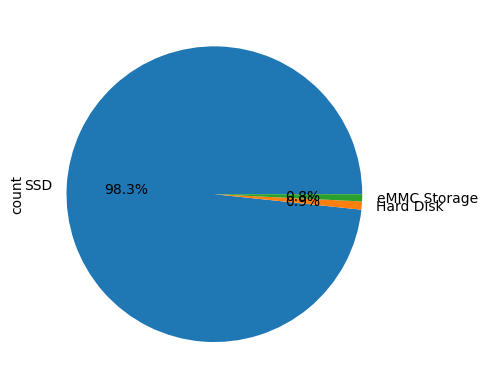

In [ ]:
df['memory_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

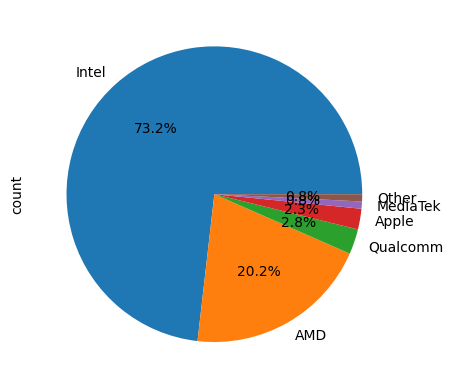

In [ ]:
df['processor_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

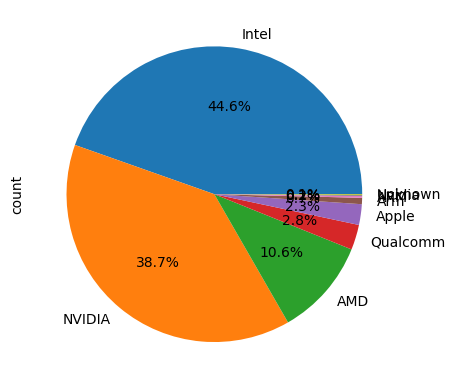

In [ ]:
df['gpu_brand'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

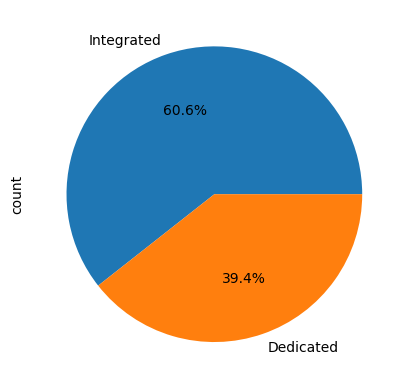

In [ ]:
df['gpu_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

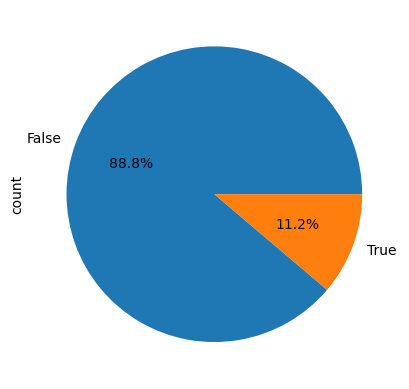

In [ ]:
df['Touch_Screen'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

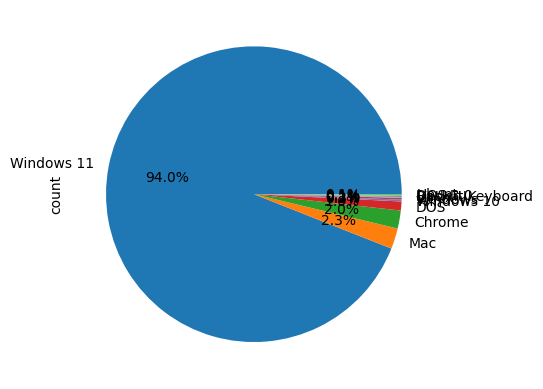

In [ ]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  print(df[column_name].skew())
  sns.catplot(kind='box',data=df,x=column_name)

In [ ]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,:].columns

2.59932022045175
0.06488503962315886
0.8425488806923279
1.793156763931846
3.085525305006516
3.3180226410687528
-0.5639352991828835
1.5736069872309064
1.656851392128396
3.362961043793587


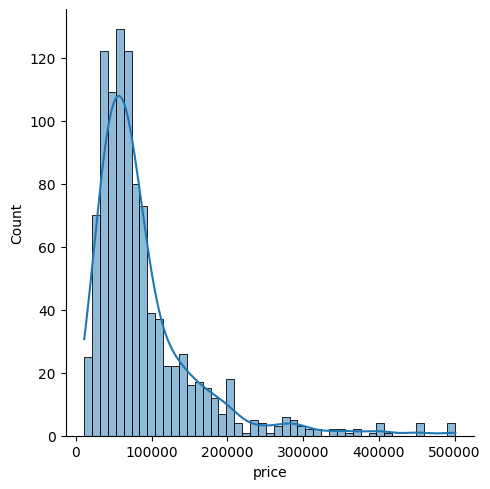

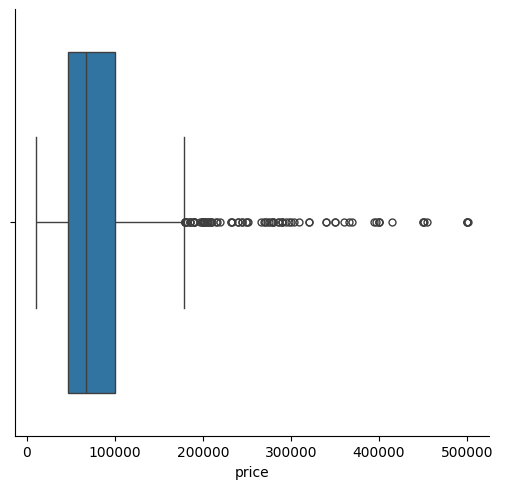

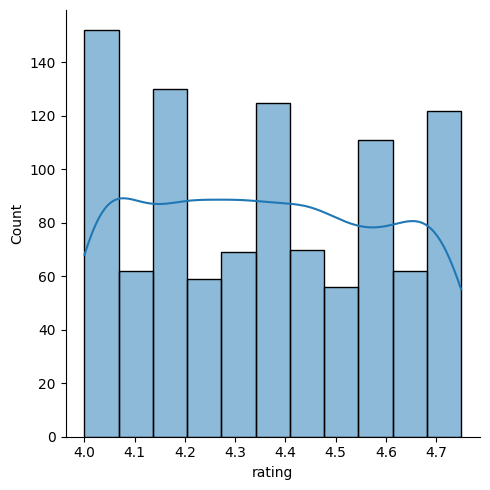

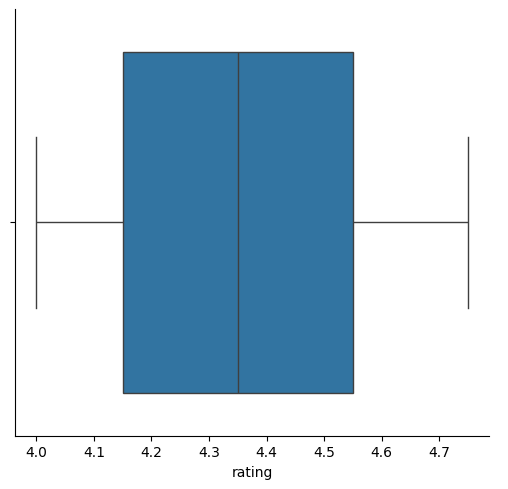

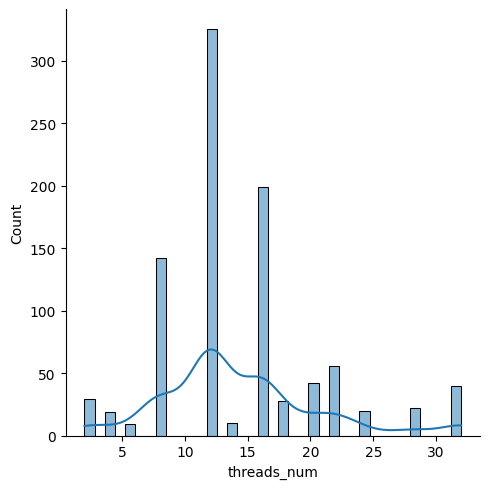

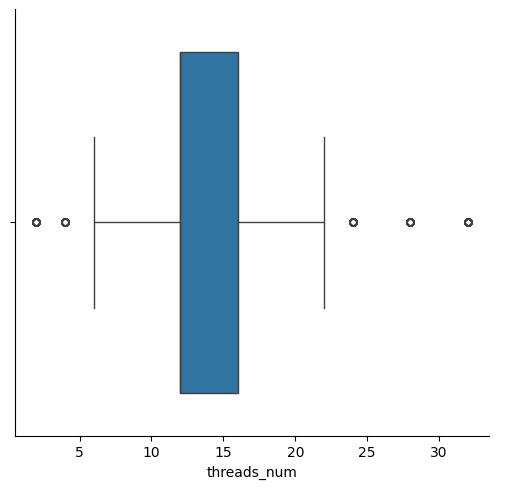

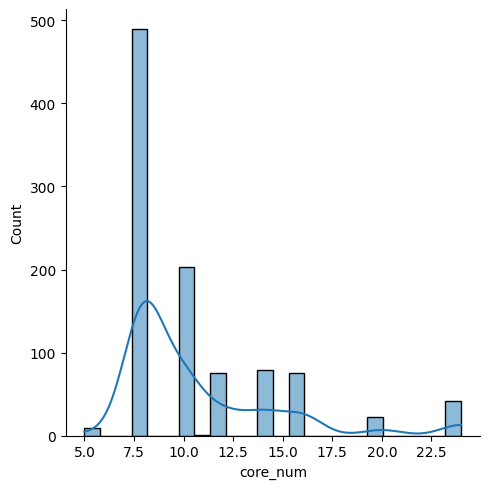

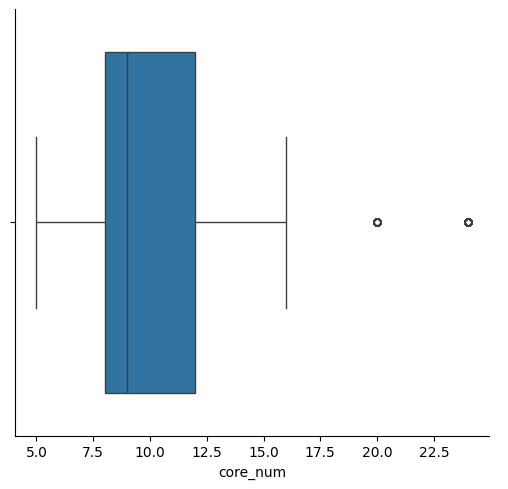

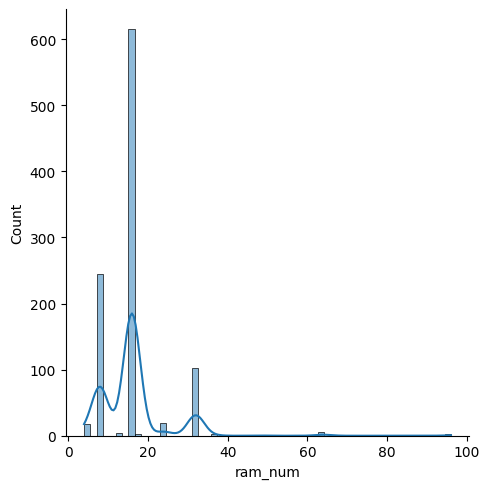

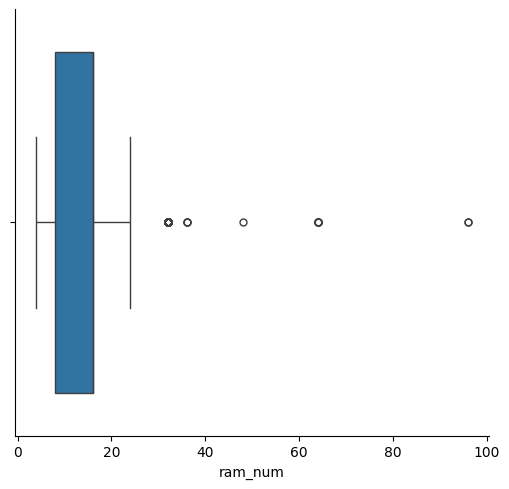

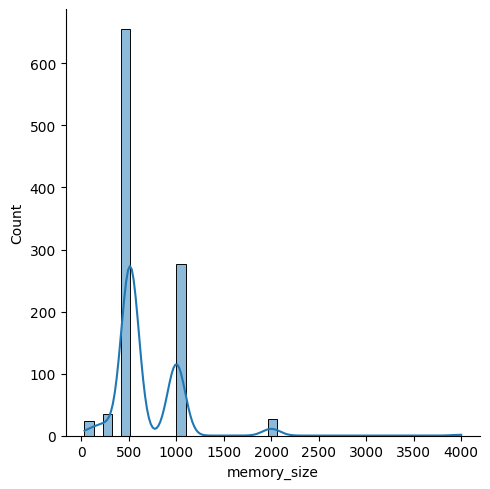

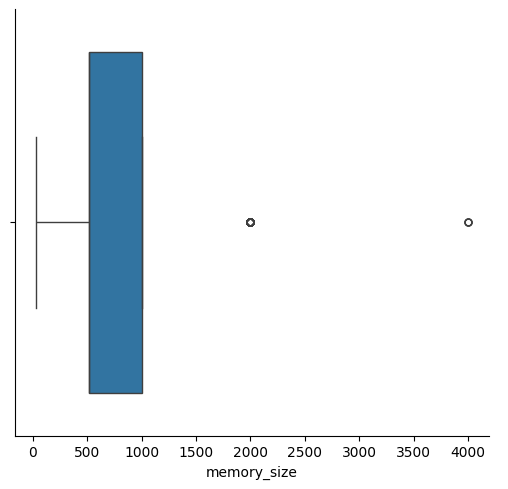

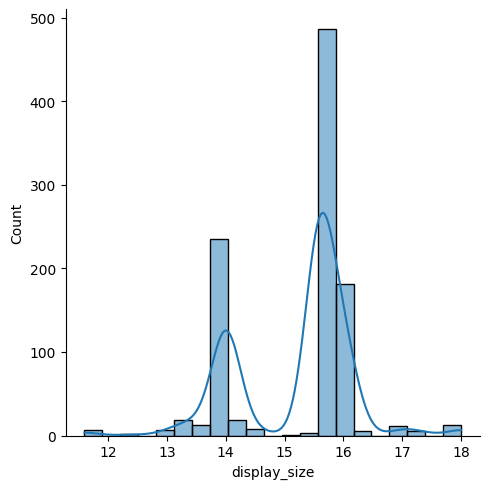

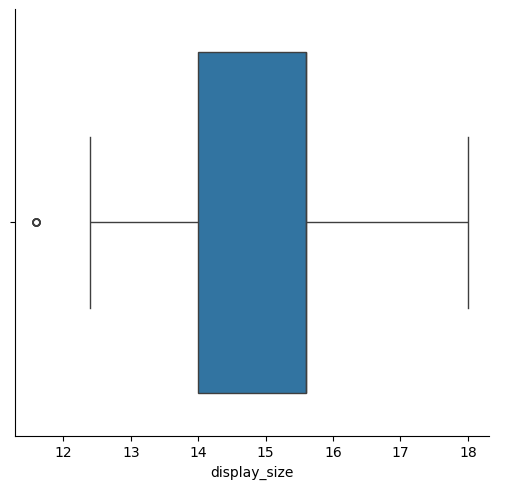

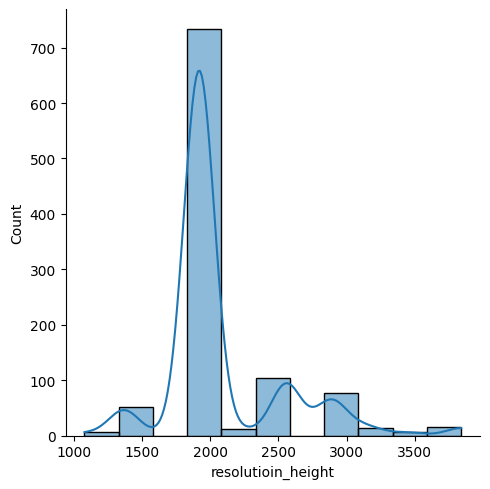

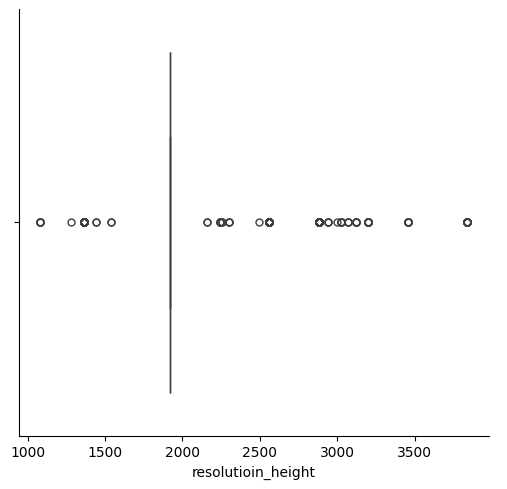

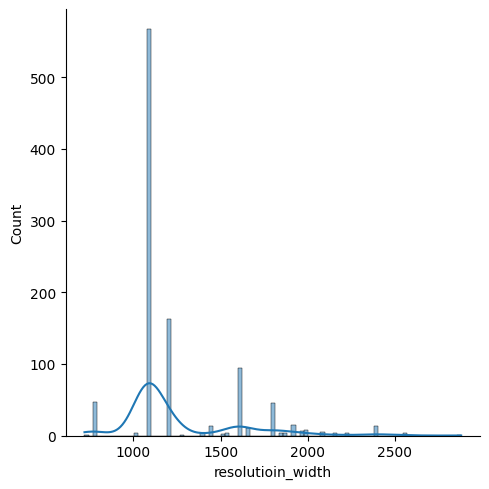

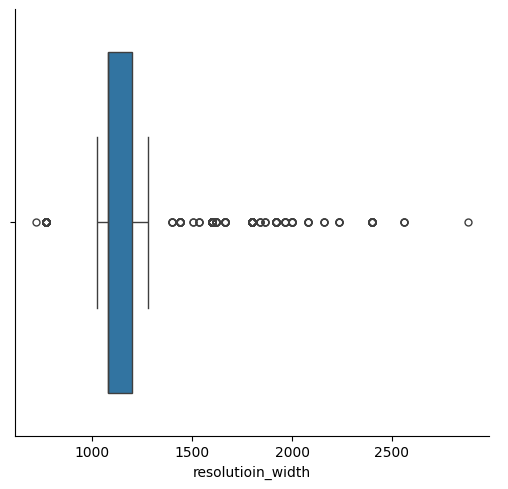

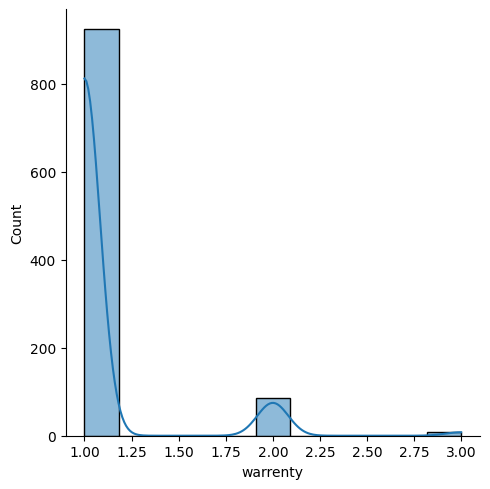

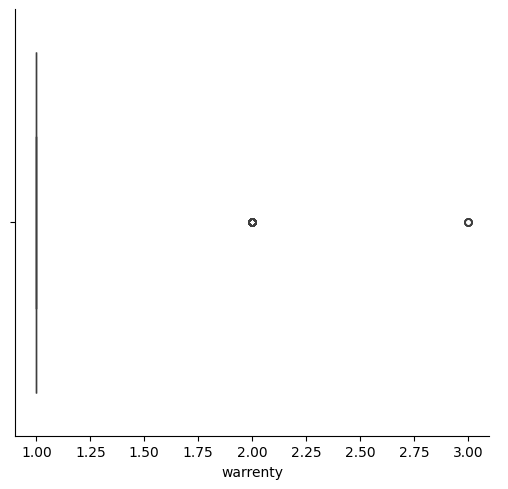

In [ ]:
for col in num_columns:
  plot_graphs(col)

###bivariate

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'processor_brand', 'iter',
       'threads_num', 'core_num', 'ram_num', 'memory_type', 'memory_size',
       'gpu_brand', 'gpu_type', 'os', 'display_size', 'resolutioin_height',
       'resolutioin_width', 'Touch_Screen', 'warrenty'],
      dtype='object')

###brand_name

In [ ]:
x = df.groupby('brand_name').count()['model']
temp_df = df[df['brand_name'].isin(x[x > 2].index)]

<Axes: xlabel='brand_name', ylabel='price'>

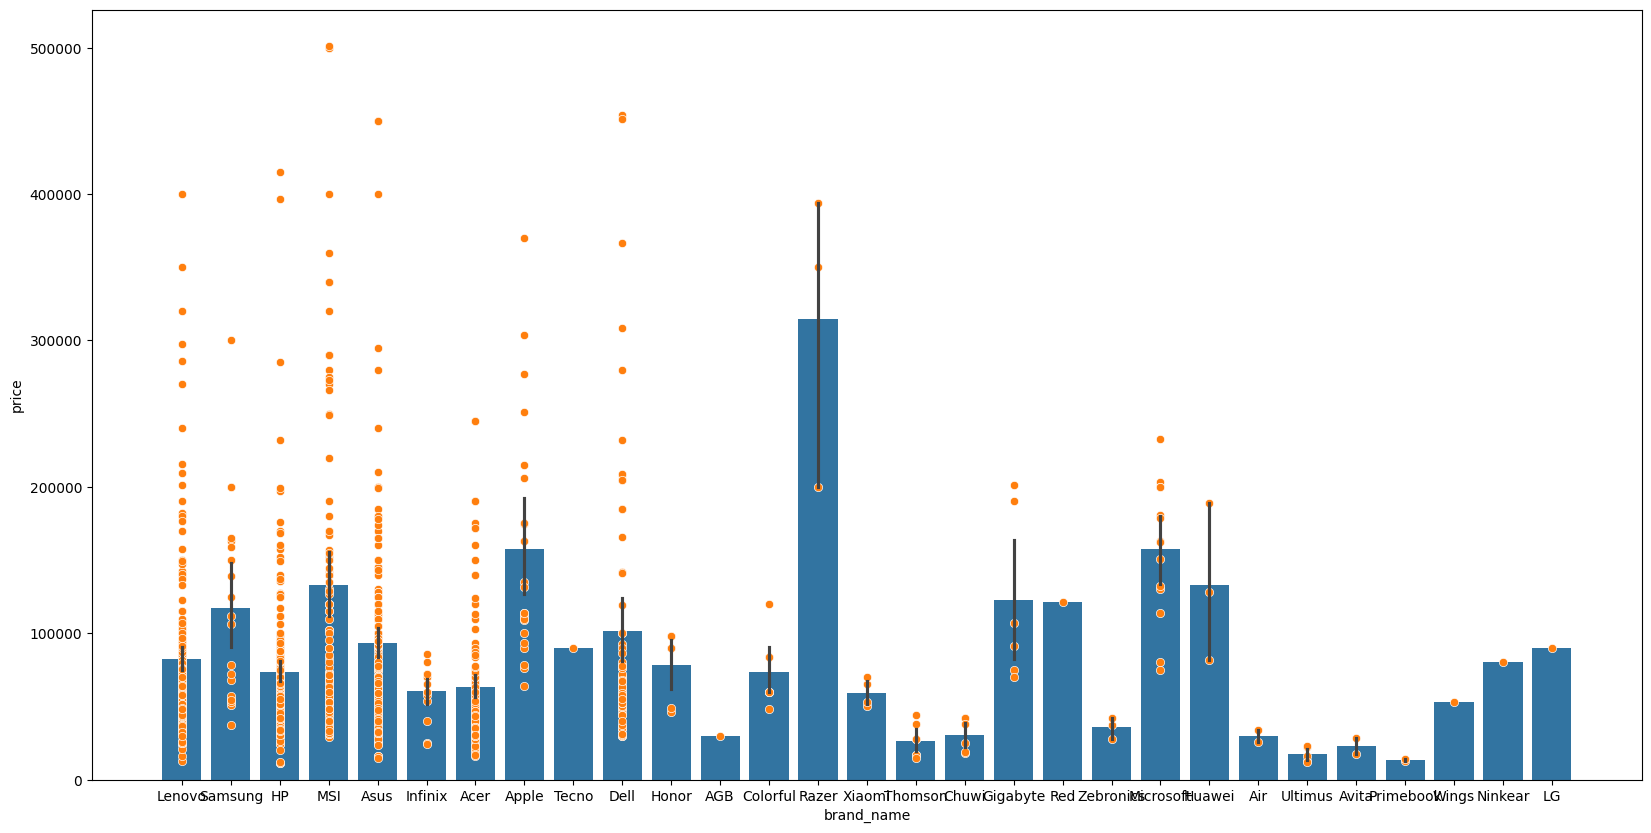

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
sns.scatterplot(data=df,x='brand_name',y='price')


<Axes: xlabel='brand_name', ylabel='rating'>

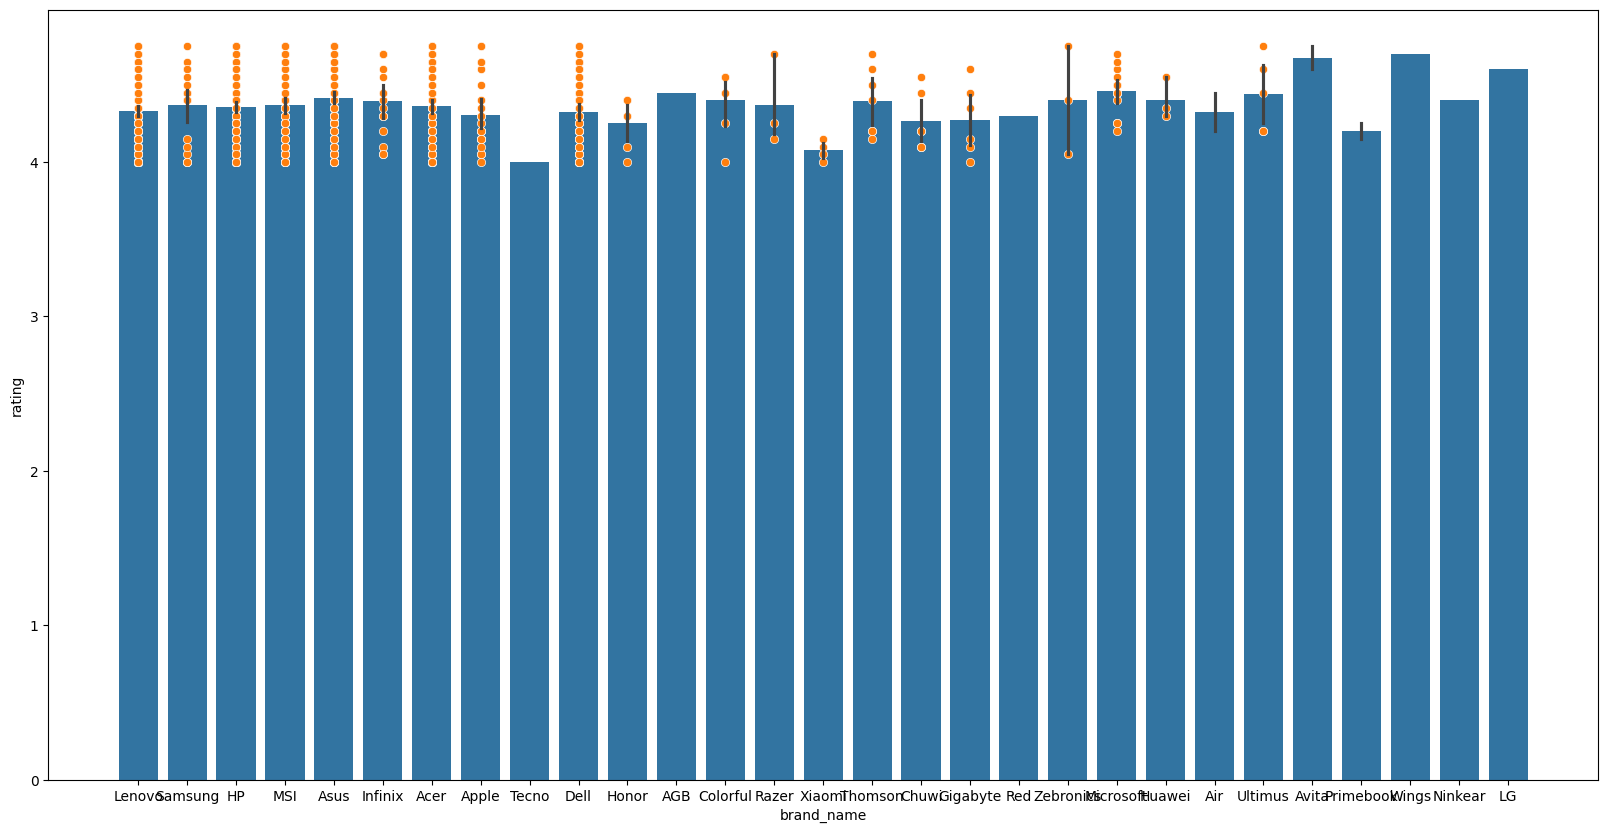

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='rating')
sns.scatterplot(data=temp_df,x='brand_name',y='rating')

<Axes: xlabel='brand_name', ylabel='threads_num'>

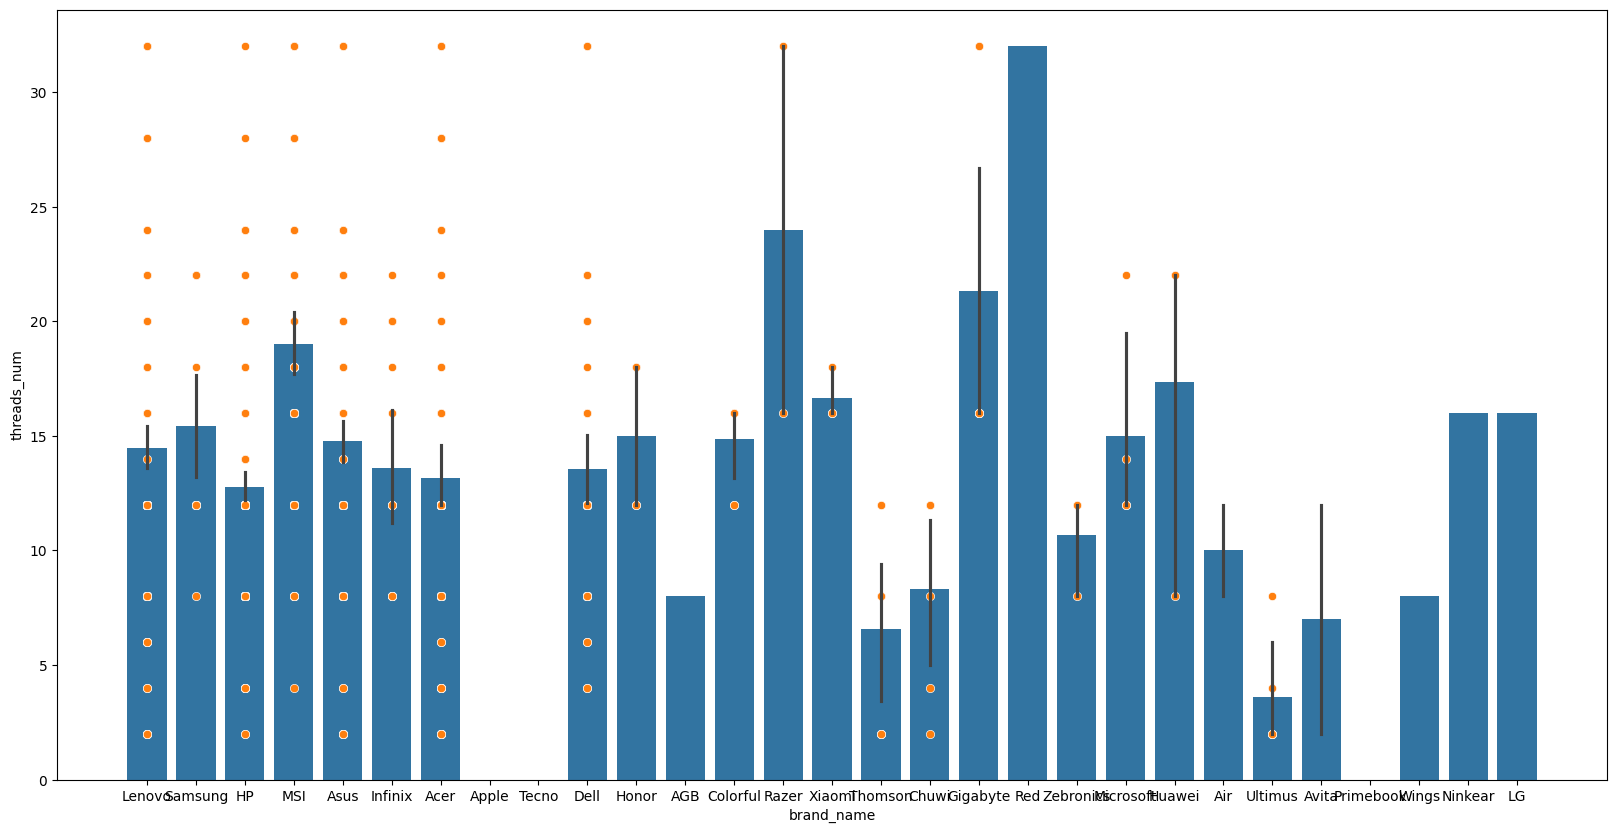

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='threads_num')
sns.scatterplot(data=temp_df,x='brand_name',y='threads_num')

<Axes: xlabel='brand_name', ylabel='core_num'>

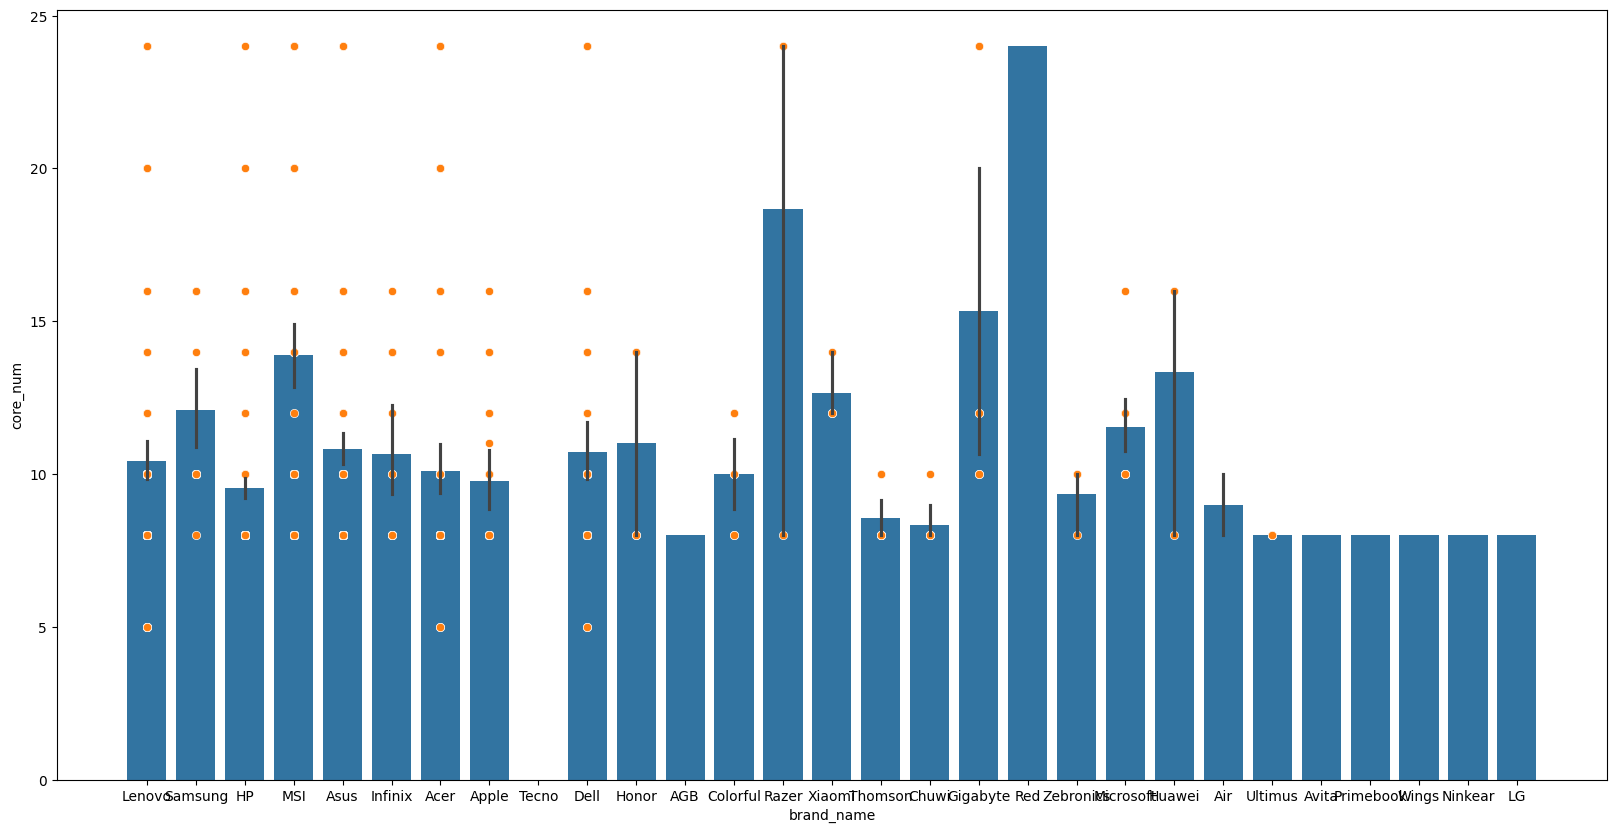

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='core_num')
sns.scatterplot(data=temp_df,x='brand_name',y='core_num')

<Axes: xlabel='brand_name', ylabel='ram_num'>

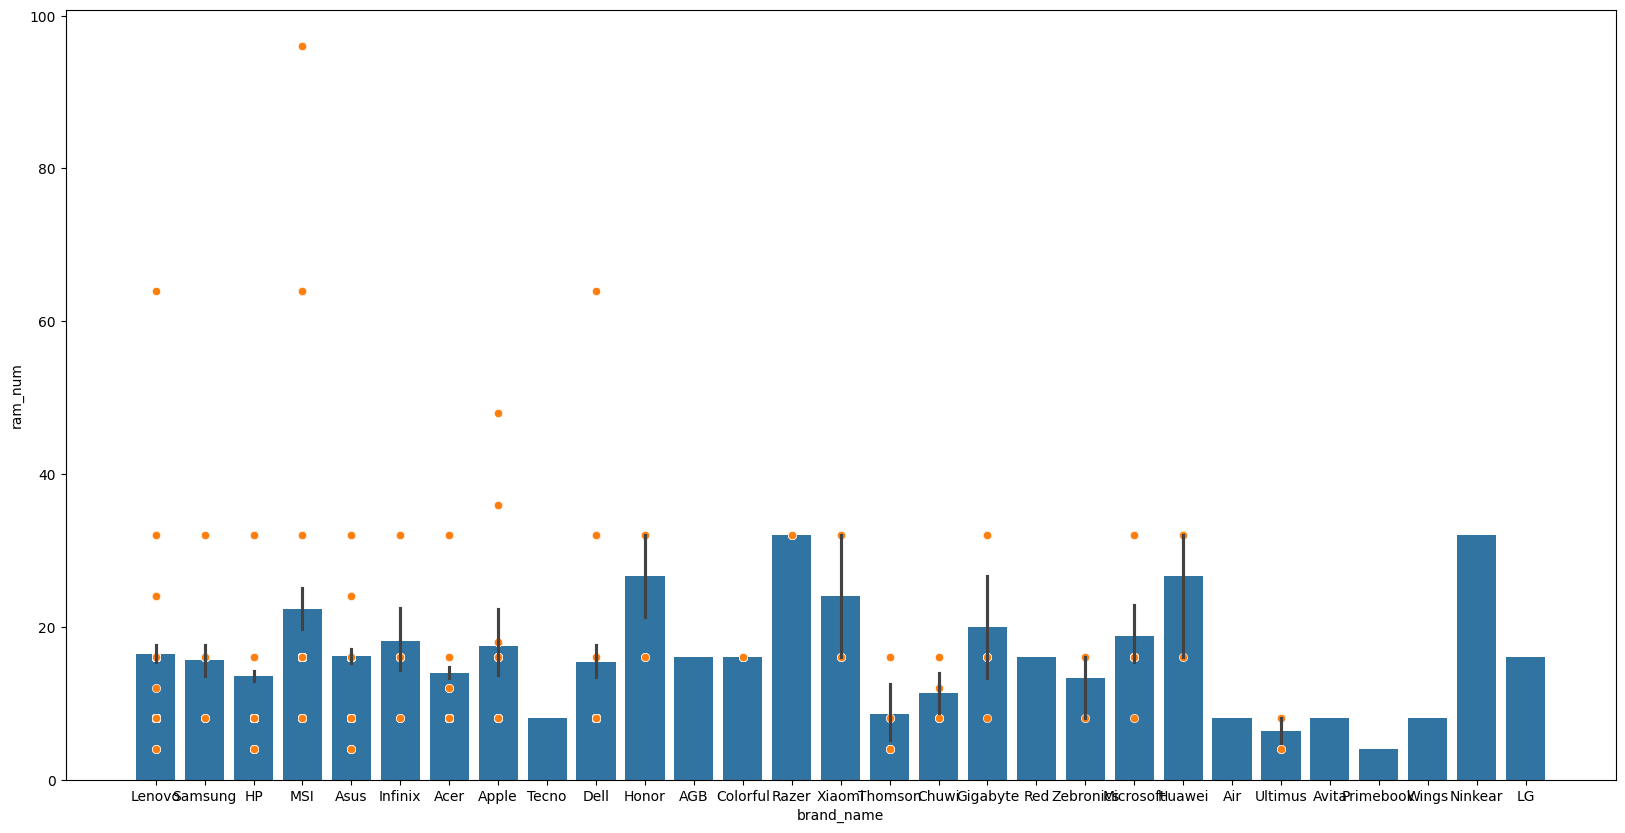

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='ram_num')
sns.scatterplot(data=temp_df,x='brand_name',y='ram_num')

<Axes: xlabel='brand_name', ylabel='memory_size'>

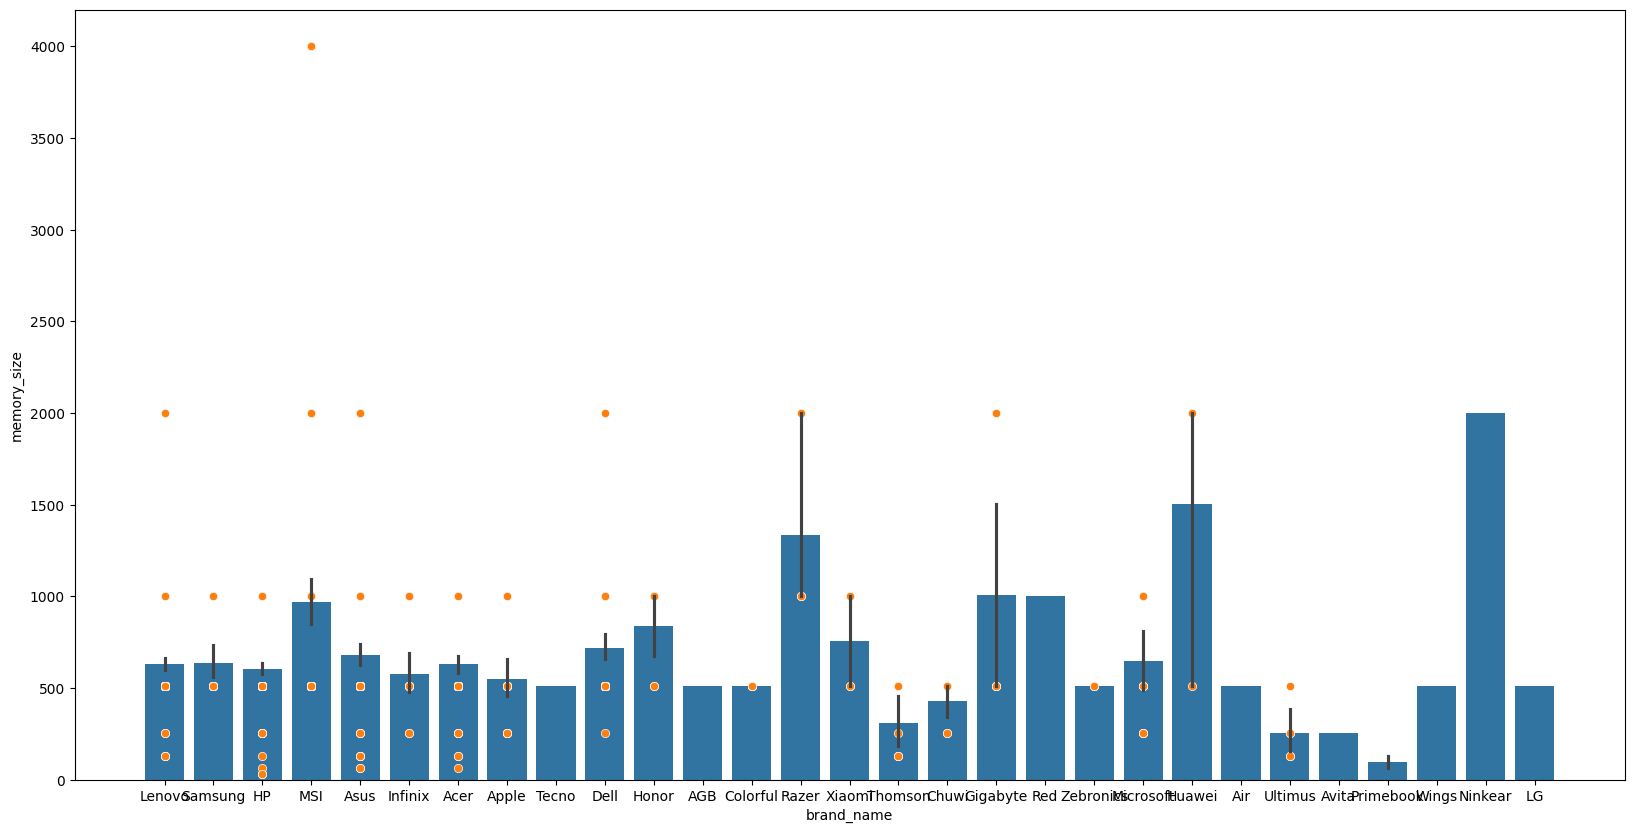

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='memory_size')
sns.scatterplot(data=temp_df,x='brand_name',y='memory_size')

<Axes: xlabel='brand_name', ylabel='display_size'>

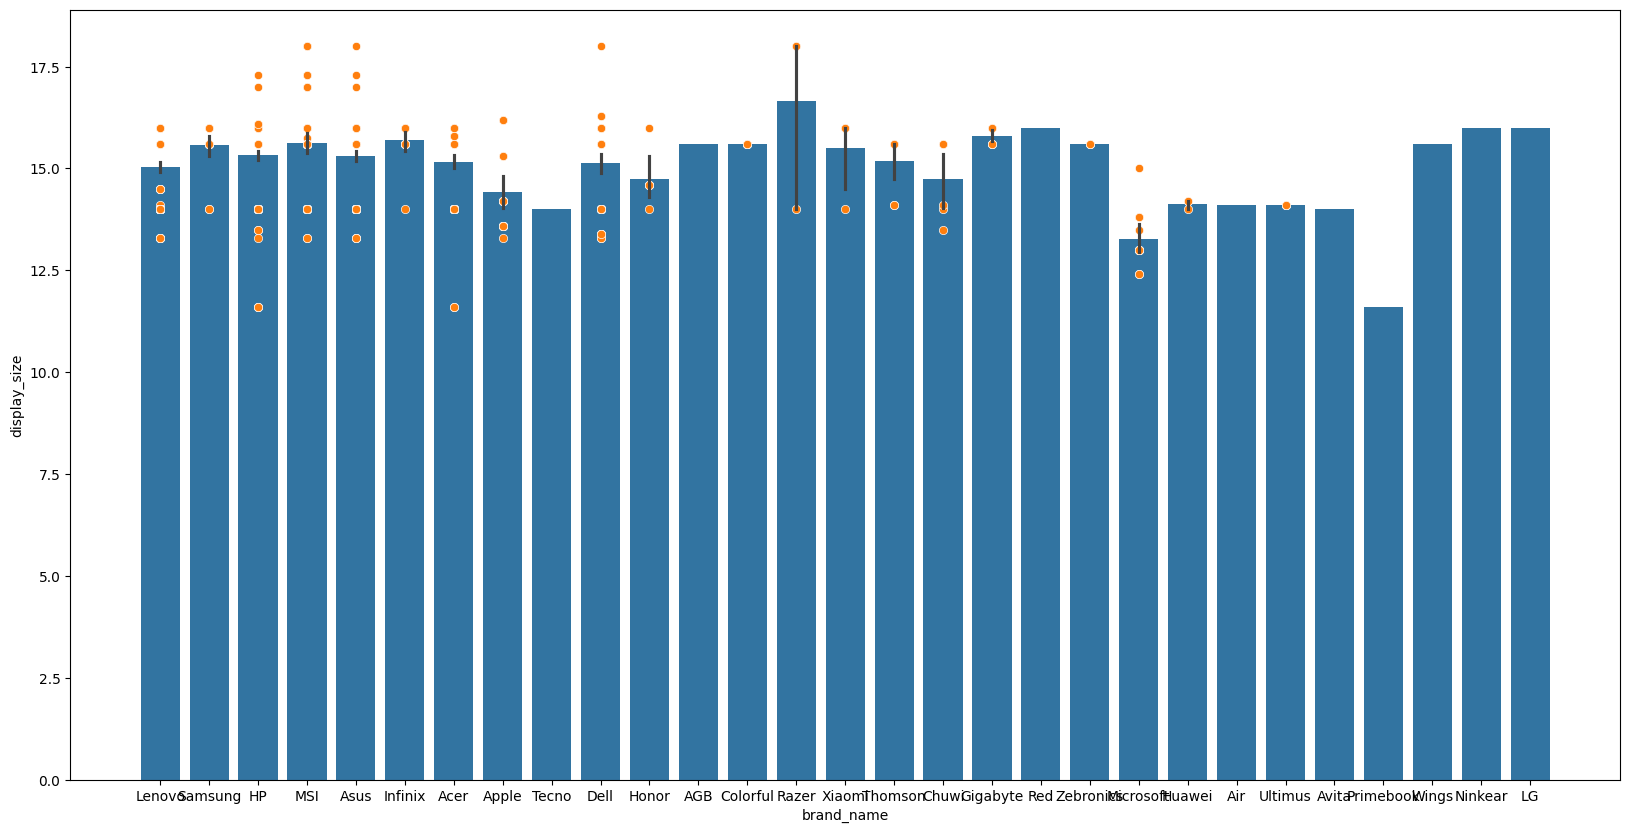

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='display_size')
sns.scatterplot(data=temp_df,x='brand_name',y='display_size')

<Axes: xlabel='brand_name', ylabel='resolutioin_height'>

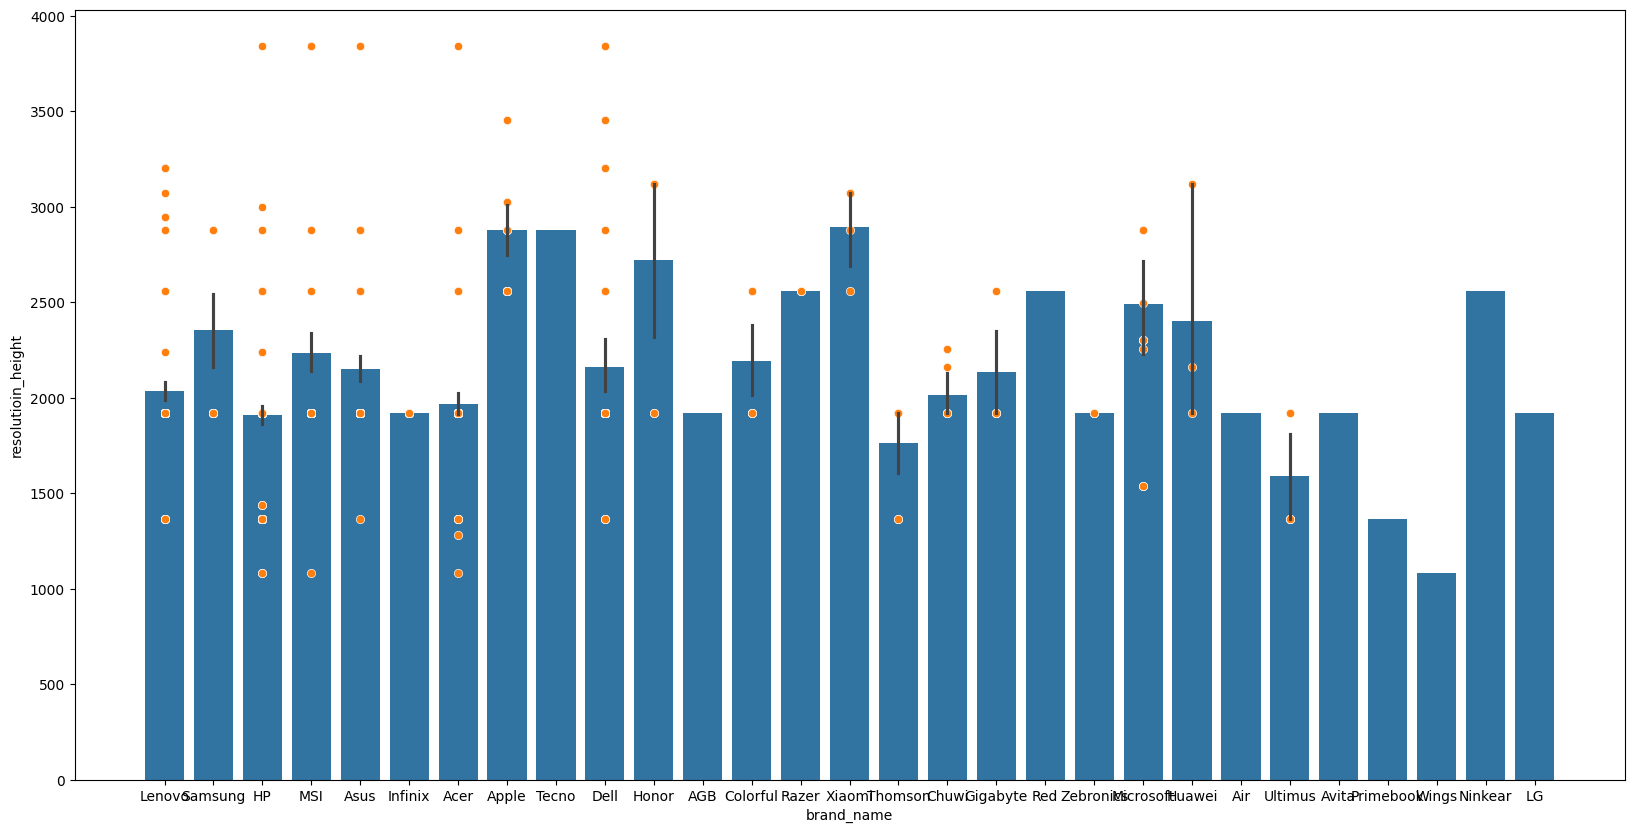

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='resolutioin_height')
sns.scatterplot(data=temp_df,x='brand_name',y='resolutioin_height')

<Axes: xlabel='brand_name', ylabel='resolutioin_width'>

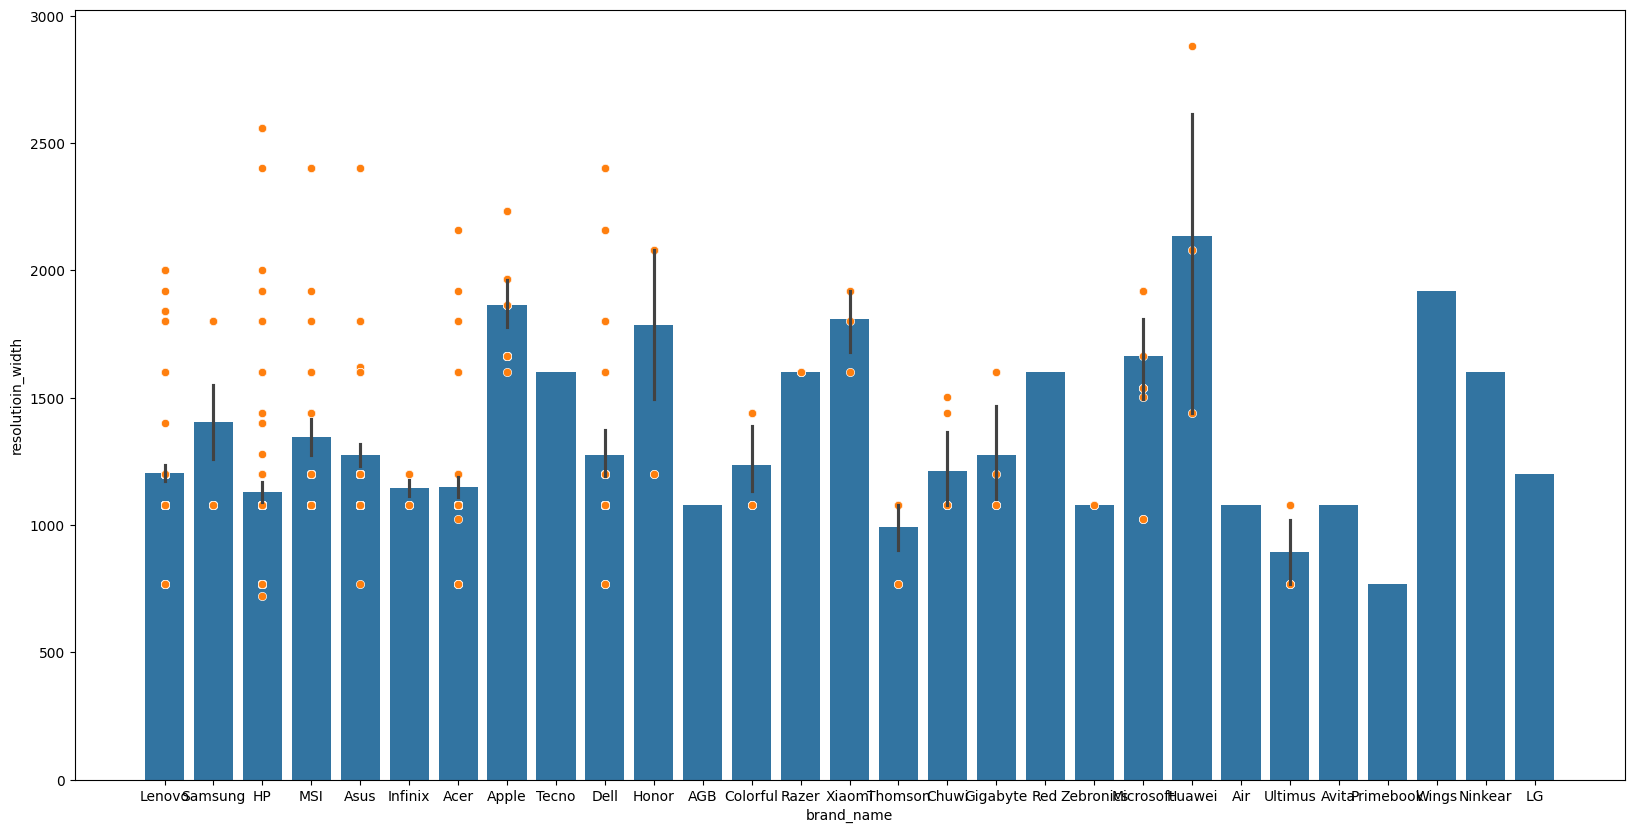

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='resolutioin_width')
sns.scatterplot(data=temp_df,x='brand_name',y='resolutioin_width')

<Axes: xlabel='brand_name', ylabel='warrenty'>

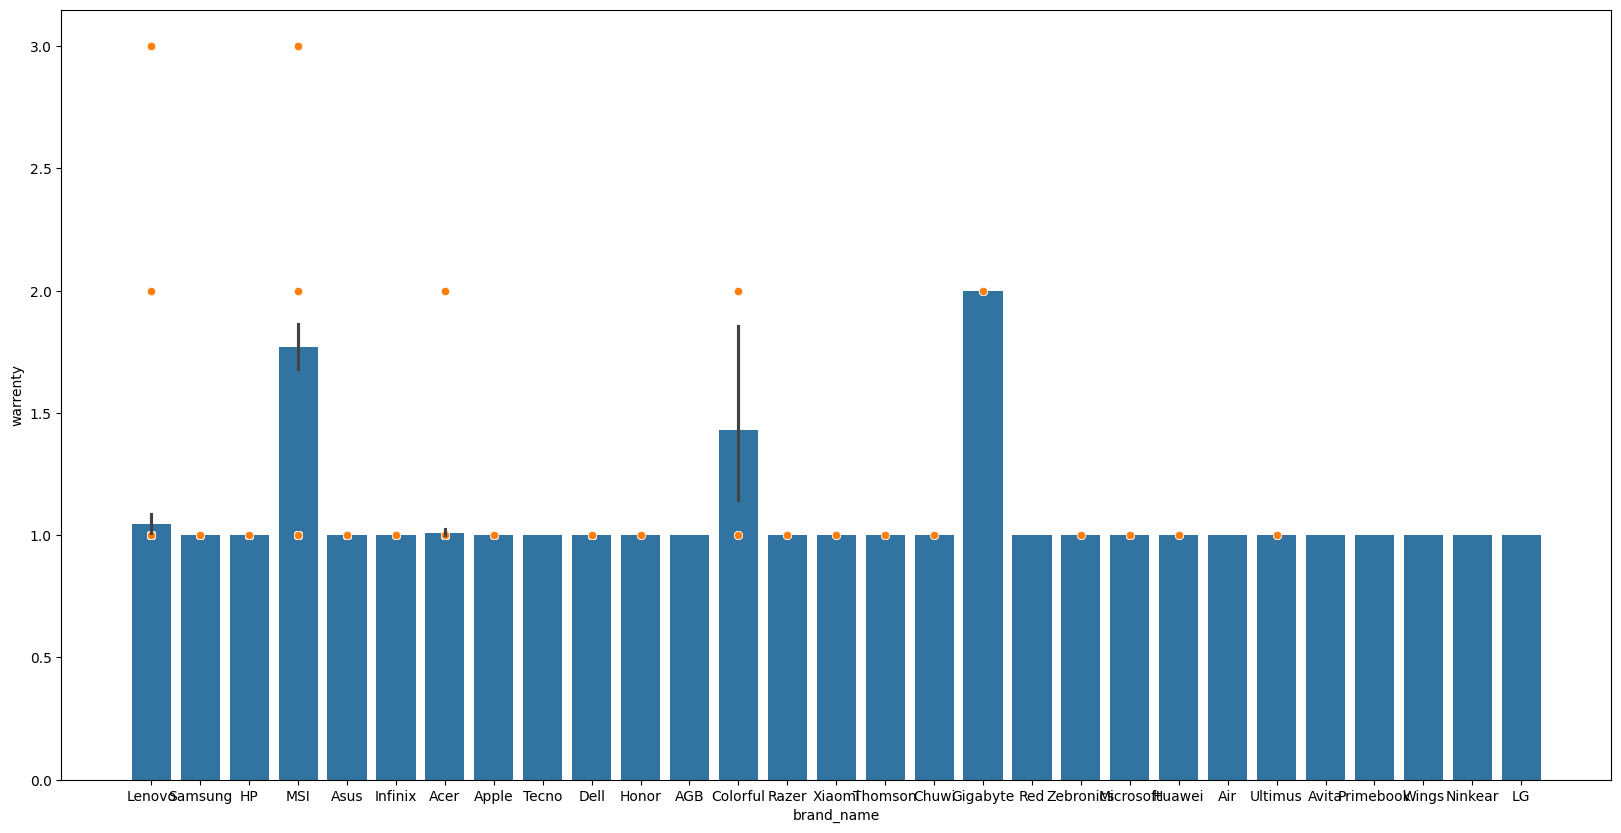

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='warrenty')
sns.scatterplot(data=temp_df,x='brand_name',y='warrenty')

###price

<Axes: xlabel='rating', ylabel='price'>

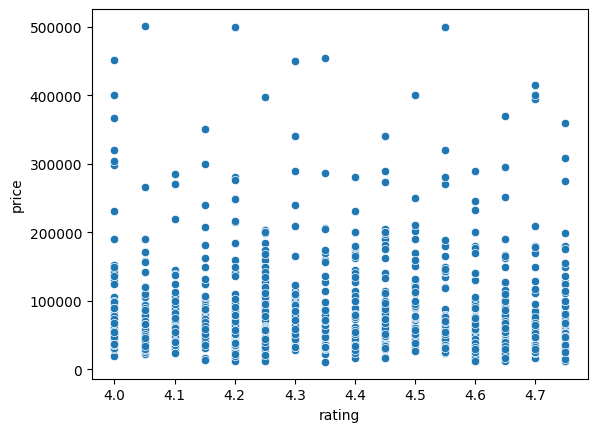

In [ ]:

sns.scatterplot(data=df,y='price',x='rating')

<Axes: xlabel='processor_brand', ylabel='price'>

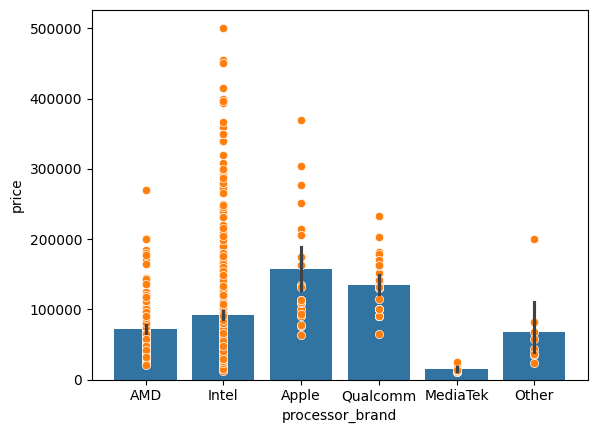

In [ ]:

sns.barplot(data=df,y='price',x='processor_brand')
sns.scatterplot(data=df,y='price',x='processor_brand')

<Axes: xlabel='iter', ylabel='price'>

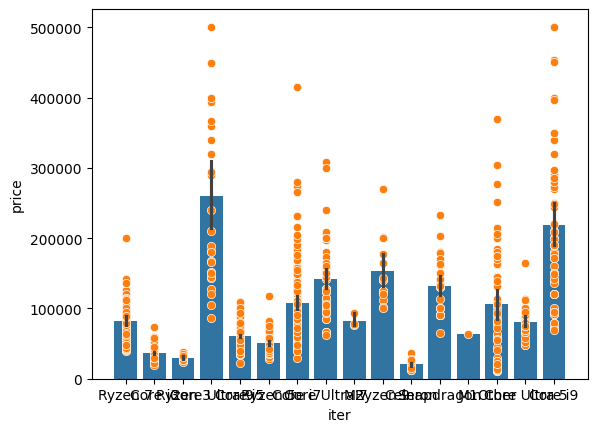

In [ ]:

sns.barplot(data=df,y='price',x='iter')
sns.scatterplot(data=df,y='price',x='iter')

<Axes: xlabel='threads_num', ylabel='price'>

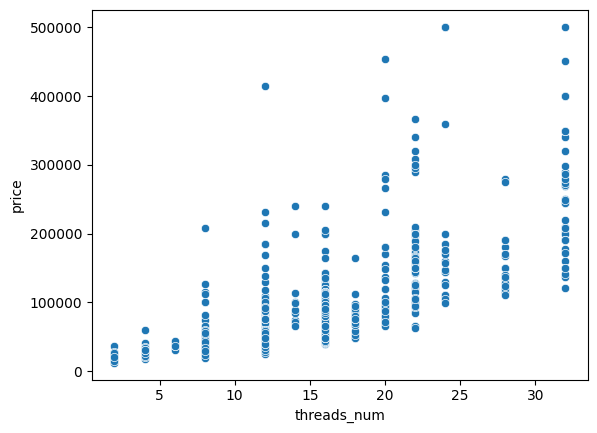

In [ ]:

sns.scatterplot(data=df,y='price',x='threads_num')

<Axes: xlabel='core_num', ylabel='price'>

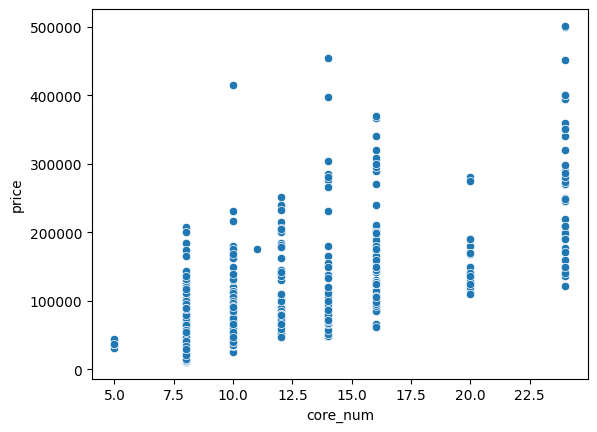

In [ ]:

sns.scatterplot(data=df,y='price',x='core_num')

<Axes: xlabel='ram_num', ylabel='price'>

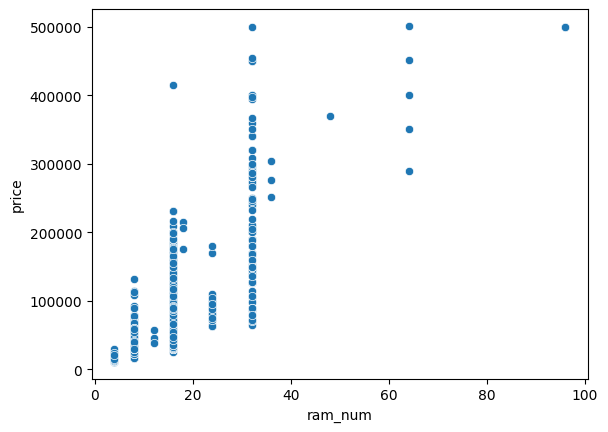

In [ ]:

sns.scatterplot(data=df,y='price',x='ram_num')

<Axes: xlabel='memory_type', ylabel='price'>

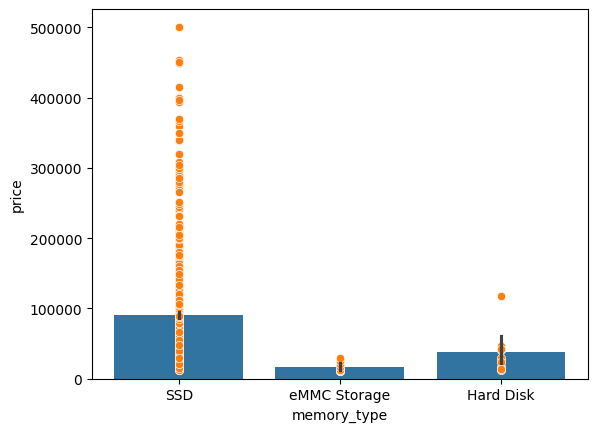

In [ ]:

sns.barplot(data=df,y='price',x='memory_type')
sns.scatterplot(data=df,y='price',x='memory_type')

<Axes: xlabel='memory_size', ylabel='price'>

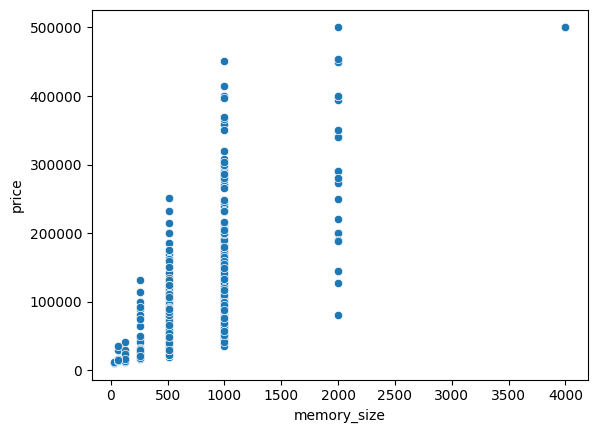

In [ ]:
sns.scatterplot(data=df,y='price',x='memory_size')

<Axes: xlabel='gpu_brand', ylabel='price'>

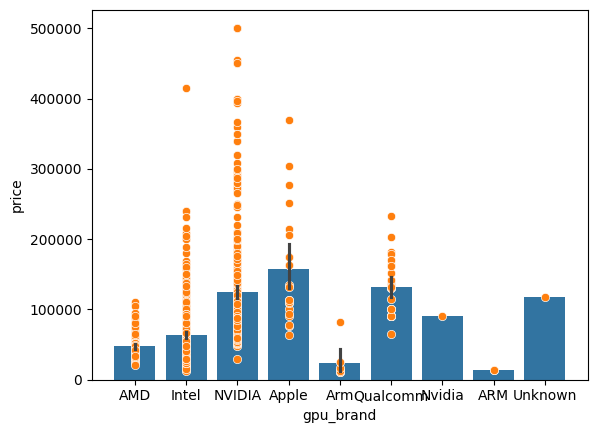

In [ ]:
sns.barplot(data=df,y='price',x='gpu_brand')
sns.scatterplot(data=df,y='price',x='gpu_brand')

<Axes: xlabel='gpu_brand', ylabel='price'>

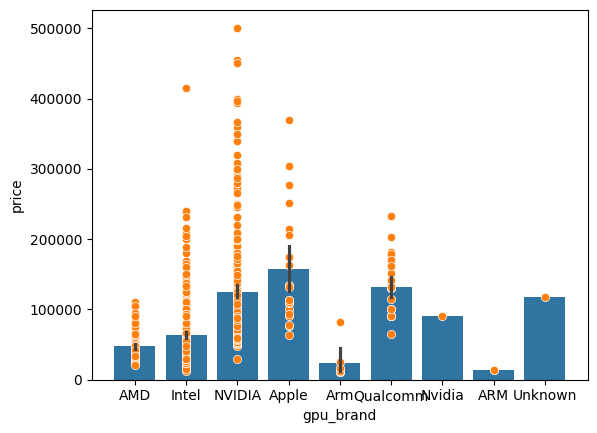

In [ ]:

sns.barplot(data=df,y='price',x='gpu_brand')
sns.scatterplot(data=df,y='price',x='gpu_brand')

<Axes: xlabel='gpu_type', ylabel='price'>

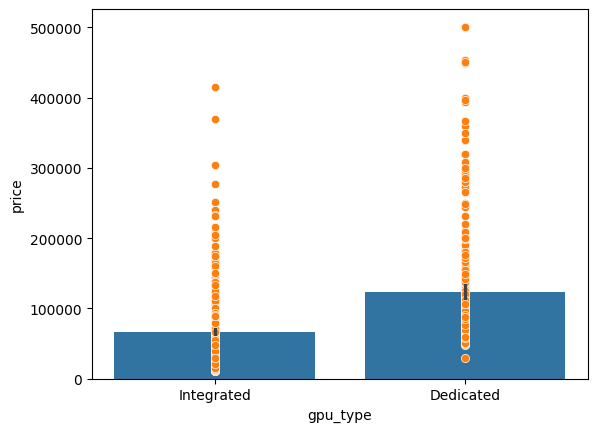

In [ ]:
sns.barplot(data=df,y='price',x='gpu_type')
sns.scatterplot(data=df,y='price',x='gpu_type')

<Axes: xlabel='display_size', ylabel='price'>

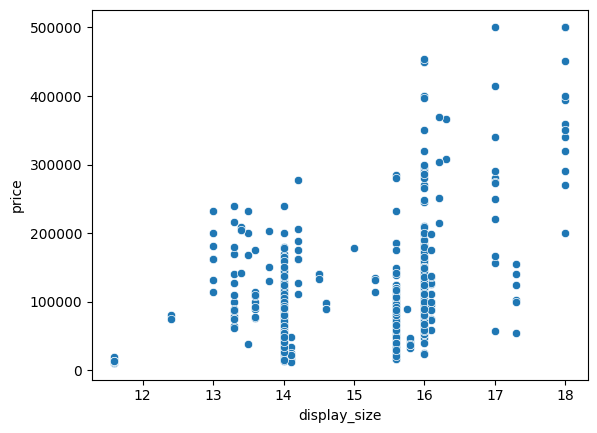

In [ ]:

sns.scatterplot(data=df,y='price',x='display_size')

<Axes: xlabel='resolutioin_height', ylabel='price'>

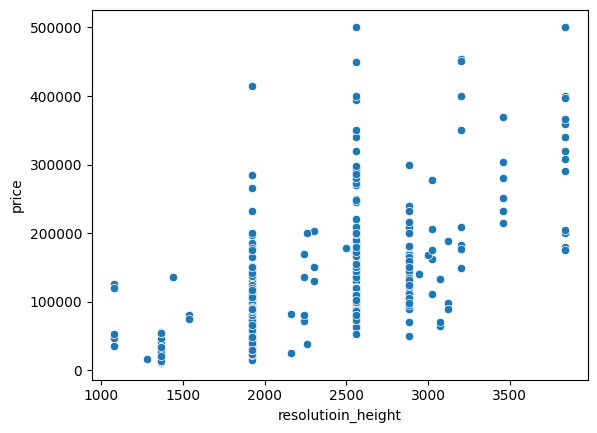

In [ ]:

sns.scatterplot(data=df,y='price',x='resolutioin_height')

<Axes: xlabel='resolutioin_width', ylabel='price'>

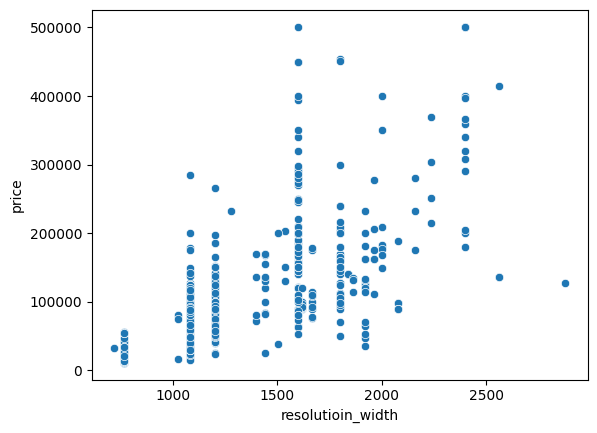

In [ ]:

sns.scatterplot(data=df,y='price',x='resolutioin_width')

<Axes: xlabel='Touch_Screen', ylabel='price'>

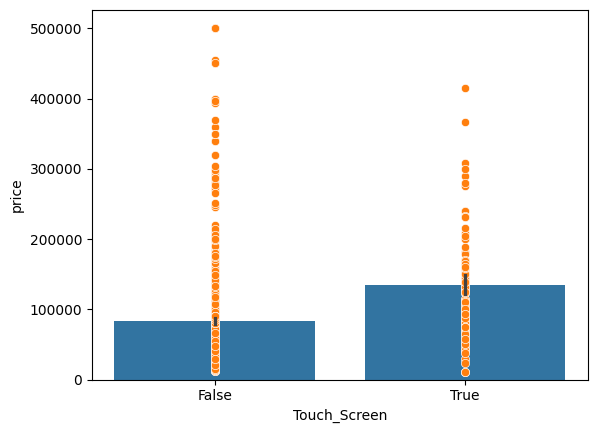

In [ ]:

sns.barplot(data=df,y='price',x='Touch_Screen')
sns.scatterplot(data=df,y='price',x='Touch_Screen')

<Axes: xlabel='os', ylabel='price'>

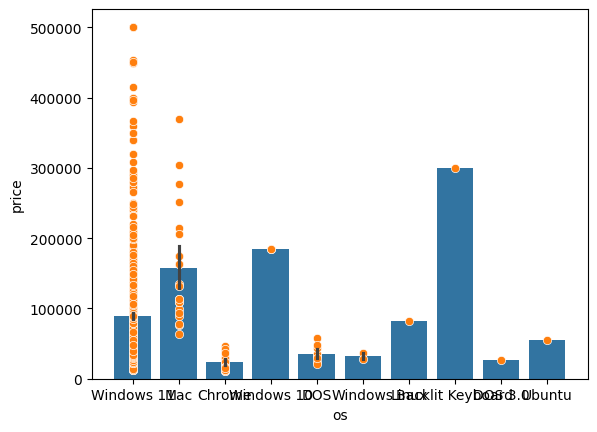

In [ ]:

sns.barplot(data=df,y='price',x='os')
sns.scatterplot(data=df,y='price',x='os')

<Axes: xlabel='warrenty', ylabel='price'>

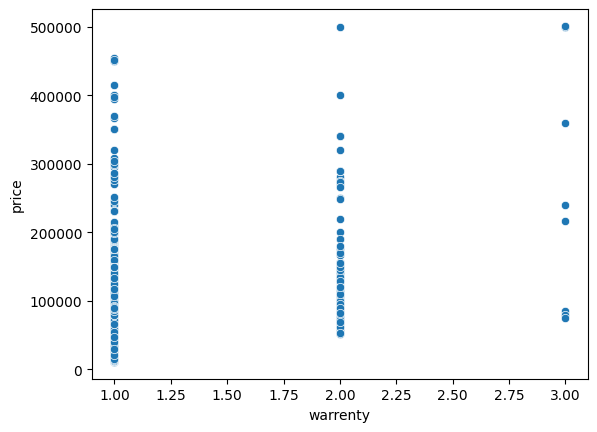

In [ ]:
sns.scatterplot(data=df,y='price',x='warrenty')

###software engineering

In [ ]:
# Example Python code (using pandas):
ppi = (
    np.sqrt(df['resolutioin_width']**2 + df['resolutioin_height']**2)
    / df['display_size']
).round(2)  # Round to 2 decimal places

In [ ]:
df.insert(16,'ppi',ppi)

In [ ]:
# Virtualization Support
df['virtualization_support'] = df['processor_brand'].apply(
    lambda x: True if x in ['Intel', 'AMD'] else False
)
#linux_compatible
df['linux_compatible'] = df['os'].isin(['Linux','Windows 11'])

# CUDA Support
df['cuda_support'] = df['gpu_brand'] == 'NVIDIA'
# Virtualization Support
df['virtualization_support'] = df['processor_brand'].apply(
    lambda x: True if x in ['Intel', 'AMD'] else False
)
#linux_compatible
df['linux_compatible'] = df['os'].isin(['Linux','Windows 11'])

# CUDA Support
df['cuda_support'] = df['gpu_brand'] == 'NVIDIA'

#code complie benchmark
def categorize_benchmark(processor):
  if processor in ['Core Ultra 9', 'Ryzen 9', 'Core i9','M2 Pro','M1 Pro']:
    return 'Fast'
  elif processor in ['Ryzen 7', 'Ryzen 5', 'Core i7', 'Core i5','Core Ultra 5','Core Ultra 7','M1','M2']:
    return 'Medium'
  else:
    return 'Slow'
#df['code_compile_benchmark'] = df['iter'].apply(categorize_benchmark)
df['code_compile_benchmark'] = df['iter'].apply(categorize_benchmark)

# Development Performance Score
df['development_performance_score'] = (
    df['core_num'] * 2 + df['threads_num'] + df['ram_num'] +
    np.where(df['gpu_type'] == 'Dedicated', 10, 0)
)

# Price-to-Performance Ratio
df['price_to_performance'] = (df['development_performance_score'] / df['price'] * 1000).round(2)

def ppi_test(processor):
  if processor >= 200:
    return 'Fast'
  elif processor >= 150 and processor <=200:
    return 'Medium'
  else:
    return 'Slow'
df['display_productivity'] = df['ppi'].apply(ppi_test)

In [ ]:
df.to_csv('laptops_software_engineering.csv',index=False)

In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'processor_brand', 'iter',
       'threads_num', 'core_num', 'ram_num', 'memory_type', 'memory_size',
       'gpu_brand', 'gpu_type', 'os', 'display_size', 'resolutioin_height',
       'ppi', 'resolutioin_width', 'Touch_Screen', 'warrenty',
       'virtualization_support', 'linux_compatible', 'cuda_support',
       'code_compile_benchmark', 'development_performance_score',
       'price_to_performance', 'display_productivity'],
      dtype='object')

In [ ]:
df.head(5)

,brand_name,model,price,rating,processor_brand,iter,threads_num,core_num,ram_num,memory_type,...,resolutioin_width,Touch_Screen,warrenty,virtualization_support,linux_compatible,cuda_support,code_compile_benchmark,development_performance_score,price_to_performance,display_productivity
0,Lenovo,Lenovo V15 G4 ‎83CR000VIN Laptop (AMD Ryzen 7 ...,39990,4.50,AMD,Ryzen 7,16.0,8.0,16,SSD,...,1080,False,1,True,True,False,Medium,48.0,1.20,Slow
1,Samsung,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,36990,4.40,Intel,Core i3,8.0,8.0,8,SSD,...,1080,False,1,True,True,False,Slow,32.0,0.87,Slow
2,HP,HP 15-fc0154AU Laptop (AMD Ryzen 3 7320U/ 8GB/...,30290,4.70,AMD,Ryzen 3,8.0,8.0,8,SSD,...,1080,False,1,True,True,False,Slow,32.0,1.06,Slow
3,MSI,MSI Titan 18 HX Gaming Laptop (Intel Core Ultr...,359900,4.75,Intel,Core Ultra 9,24.0,24.0,32,SSD,...,2400,False,3,True,True,True,Fast,114.0,0.32,Fast
4,Asus,Asus Vivobook 16X 2023 K3605ZC-MBN544WS Laptop...,59140,4.10,Intel,Core i5,16.0,12.0,16,SSD,...,1200,False,1,True,True,True,Medium,66.0,1.12,Slow


In [ ]:
df.corr(numeric_only=True)['price']

,price
price,1.000000
rating,0.011212
threads_num,0.718910
core_num,0.700269
ram_num,0.758598
memory_size,0.727683
display_size,0.284968
resolutioin_height,0.698241
ppi,0.606710
resolutioin_width,0.712374


In [ ]:
df.corr(numeric_only=True)['rating']

,rating
price,0.011212
rating,1.000000
threads_num,0.003991
core_num,0.033154
ram_num,0.008121
memory_size,0.022748
display_size,0.012987
resolutioin_height,0.006387
ppi,0.010940
resolutioin_width,0.026582


In [ ]:
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,0
processor_brand,0
iter,0
threads_num,77
core_num,22
ram_num,0
memory_type,0


###Filling null value

In [ ]:
# knn imputer
df.shape

(1018, 27)

In [ ]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
x_df_values = imputer.fit_transform(x_df)

In [ ]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [ ]:
x_df['price'] = df['price']

In [ ]:
x_df.head()

,rating,threads_num,core_num,ram_num,memory_size,display_size,resolutioin_height,ppi,resolutioin_width,warrenty,development_performance_score,price_to_performance,price
0,4.50,16.0,8.0,16.0,512.0,15.6,1920.0,141.21,1080.0,1.0,48.0,1.20,39990
1,4.40,8.0,8.0,8.0,512.0,15.6,1920.0,141.21,1080.0,1.0,32.0,0.87,36990
2,4.70,8.0,8.0,8.0,512.0,15.6,1920.0,141.21,1080.0,1.0,32.0,1.06,30290
3,4.75,24.0,24.0,32.0,1000.0,18.0,3840.0,251.57,2400.0,3.0,114.0,0.32,359900
4,4.10,16.0,12.0,16.0,512.0,16.0,1920.0,141.51,1200.0,1.0,66.0,1.12,59140


In [ ]:
a = x_df.corr()['price'].reset_index()

In [ ]:
b = df.corr(numeric_only=True)['price'].reset_index()

In [ ]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.011212,0.011212
2,threads_num,0.718910,0.714812
3,core_num,0.700269,0.699265
4,ram_num,0.758598,0.758598
5,memory_size,0.727683,0.727683
6,display_size,0.284968,0.284968
7,resolutioin_height,0.698241,0.698241
8,ppi,0.606710,0.606710
9,resolutioin_width,0.712374,0.712374


In [ ]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr(numeric_only=True)['price']

,price
price,1.000000
rating,0.011212
threads_num,0.718910
core_num,0.700269
ram_num,0.758598
memory_size,0.727683
display_size,0.284968
resolutioin_height,0.698241
ppi,0.606710
resolutioin_width,0.712374


In [ ]:
x_df.isnull().sum()

,0
rating,0
threads_num,0
core_num,0
ram_num,0
memory_size,0
display_size,0
resolutioin_height,0
ppi,0
resolutioin_width,0
warrenty,0


In [ ]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'processor_brand', 'iter',
       'threads_num', 'core_num', 'ram_num', 'memory_type', 'memory_size',
       'gpu_brand', 'gpu_type', 'os', 'display_size', 'resolutioin_height',
       'ppi', 'resolutioin_width', 'Touch_Screen', 'warrenty',
       'virtualization_support', 'linux_compatible', 'cuda_support',
       'code_compile_benchmark', 'development_performance_score',
       'price_to_performance', 'display_productivity'],
      dtype='object')

In [ ]:
x_df.insert(0,"brand_name",df['brand_name'])
x_df.insert(1,"model",df['model'])
x_df.insert(2,"processor_brand",df['processor_brand'])
x_df.insert(3,"iter",df['iter'])
x_df.insert(5,"memory_type",df['memory_type'])
x_df.insert(6,"gpu_brand",df['gpu_brand'])
x_df.insert(7,"gpu_type",df['gpu_type'])
x_df.insert(8,"Touch_Screen",df['Touch_Screen'])
x_df.insert(9,"os",df['os'])
x_df.insert(10,"virtualization_support",df['virtualization_support'])
x_df.insert(11,"linux_compatible",df['linux_compatible'])
x_df.insert(12,"cuda_support",df['cuda_support'])
x_df.insert(13,"code_compile_benchmark",df['code_compile_benchmark'])
x_df.insert(14,"display_productivity",df['display_productivity'])

In [ ]:
x_df.head()

,brand_name,model,processor_brand,iter,rating,memory_type,gpu_brand,gpu_type,Touch_Screen,os,...,ram_num,memory_size,display_size,resolutioin_height,ppi,resolutioin_width,warrenty,development_performance_score,price_to_performance,price
0,Lenovo,Lenovo V15 G4 ‎83CR000VIN Laptop (AMD Ryzen 7 ...,AMD,Ryzen 7,4.50,SSD,AMD,Integrated,False,Windows 11,...,16.0,512.0,15.6,1920.0,141.21,1080.0,1.0,48.0,1.20,39990
1,Samsung,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,Intel,Core i3,4.40,SSD,Intel,Integrated,False,Windows 11,...,8.0,512.0,15.6,1920.0,141.21,1080.0,1.0,32.0,0.87,36990
2,HP,HP 15-fc0154AU Laptop (AMD Ryzen 3 7320U/ 8GB/...,AMD,Ryzen 3,4.70,SSD,AMD,Integrated,False,Windows 11,...,8.0,512.0,15.6,1920.0,141.21,1080.0,1.0,32.0,1.06,30290
3,MSI,MSI Titan 18 HX Gaming Laptop (Intel Core Ultr...,Intel,Core Ultra 9,4.75,SSD,NVIDIA,Dedicated,False,Windows 11,...,32.0,1000.0,18.0,3840.0,251.57,2400.0,3.0,114.0,0.32,359900
4,Asus,Asus Vivobook 16X 2023 K3605ZC-MBN544WS Laptop...,Intel,Core i5,4.10,SSD,NVIDIA,Dedicated,False,Windows 11,...,16.0,512.0,16.0,1920.0,141.51,1200.0,1.0,66.0,1.12,59140


In [ ]:
x_df.to_csv('laptops.cvs',index=False)

In [ ]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   brand_name                     1018 non-null   object 
 1   model                          1018 non-null   object 
 2   processor_brand                1018 non-null   object 
 3   iter                           1018 non-null   object 
 4   rating                         1018 non-null   float64
 5   memory_type                    1018 non-null   object 
 6   gpu_brand                      1018 non-null   object 
 7   gpu_type                       1018 non-null   object 
 8   Touch_Screen                   1018 non-null   bool   
 9   os                             1018 non-null   object 
 10  virtualization_support         1018 non-null   bool   
 11  linux_compatible               1018 non-null   bool   
 12  cuda_support                   1018 non-null   b